In [1]:
from izzy.datasets import random_modeling_dataset

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
# Number of observations
n_observations = 1000000

# Number of predictors
n_predictors = 5

# Class balance
class_balance = 0.5

# Create dataset
df = random_modeling_dataset(n_observations, n_predictors, class_balance)

In [3]:
columns = [column for column in df.columns if column != 'outcome']

# Look at feature performance
print('Univariate slope:')
for column in columns:
    print(column, '=', np.polyfit(df[column], df['outcome'], 1)[0])

print('\nCorrelation with outcome:')
for column in columns:
    print(column, '=', np.corrcoef(df[column], df['outcome'])[0, 1])


Univariate slope:
feature0 = 0.05866914366167055
feature1 = 0.01528872074672837
feature2 = 0.05814889051634267
feature3 = 0.015183176670614277
feature4 = 0.05915652254511588

Correlation with outcome:
feature0 = 0.24211640609426588
feature1 = 0.12335764941660178
feature2 = 0.2397533877061573
feature3 = 0.12218202649292959
feature4 = 0.24376673394956513


In [4]:
# Build models
x = df[['feature0', 'feature1', 'feature2']]
y = df['outcome']

logit1 = LogisticRegression()
logit2 = LogisticRegression(class_weight='balanced')

logit1.fit(x, y)
logit2.fit(x, y)

y_pred1 = logit1.predict_proba(x)[:, 1]
y_pred2 = logit2.predict_proba(x)[:, 1]

Imbalanced AUC= 0.7009802537677297
Implicitly Balanced AUC= 0.7009802525517254


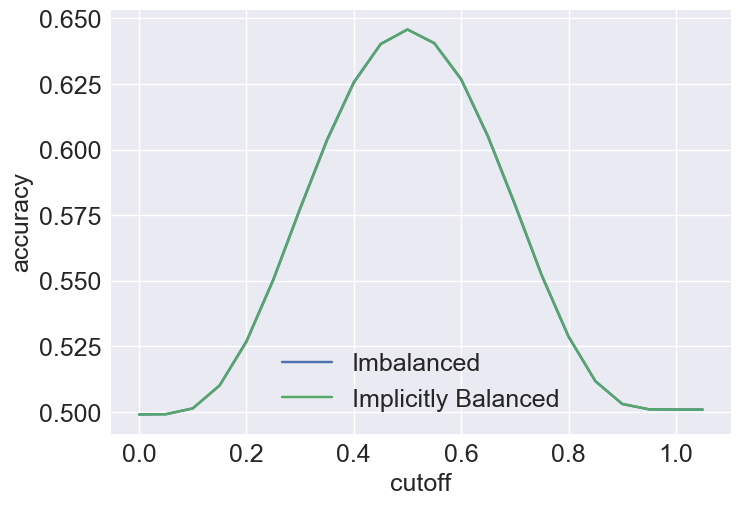

In [5]:
# AUC
print('Imbalanced AUC=', roc_auc_score(y, y_pred1))
print('Implicitly Balanced AUC=', roc_auc_score(y, y_pred2))

# Compute accuracy vs threshold
thresholds = np.arange(0, 1.1, 0.05)
accuracies1 = []
accuracies2 = []
for threshold in thresholds:
    accuracies1.append(accuracy_score(y, y_pred1 >= threshold))
    accuracies2.append(accuracy_score(y, y_pred2 >= threshold))
    
# Plot
plt.figure()
plt.plot(thresholds, accuracies1, label='Imbalanced')
plt.plot(thresholds, accuracies2, label='Implicitly Balanced')
plt.xlabel('cutoff')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [6]:
# Finally look at the coefficients
result = pd.DataFrame({
    'feature': x.columns,
    'coef1': logit1.coef_[0],
    'coef2': logit2.coef_[0]
})

result.loc[len(result)] = [
    'intecept', 
    logit1.intercept_[0],
    logit2.intercept_[0]
]

print(result.set_index('feature'))


             coef1     coef2
feature                     
feature0  0.249376  0.249376
feature1  0.062439  0.062438
feature2  0.246838  0.246837
intecept -0.282557 -0.278808
